<a href="https://colab.research.google.com/github/prof-Thiago-Nunes/Projetos-data-science-/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Cidade de Nova York*
Está na dúvida de onde ir?

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Airbnb é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

Airbnb permite aos indivíduos alugar o todo ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação e o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países. Desde sua criação em Novembro de 2008 até Junho de 2012, mais de 10 milhões de reservas foram agendadas via Airbnb.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados




Os dados utilizados neste projeto foram retirados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


Observação importante: O site está em constante mudança, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Recomendo que acessem o site do airbnb para obter um novo link para uma nova análise.

Com isso em mente, vamos ao projeto.


In [27]:
# importar os pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# para utilizar os gráficos do plotly
import json
import plotly.express as px
from plotly import graph_objects as go
from urllib.request import urlopen



In [28]:
# Importar a geolocalização disponível no site do airbnb para a biblioteca plotly
with urlopen("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/neighbourhoods.geojson") as response:
  geo = json.load(response)

In [26]:
# importar o arquivo do airbnb para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-11-02/visualisations/listings.csv", 
                 low_memory=False)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,322,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,408,2021-06-29,4.91,1,220,38,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.53,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,91,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,505,2021-10-20,3.70,1,218,31,NaN


## Análise dos Dados
Antes de começar qualquer análise, precisamos entender quais as variáveis e seus significados.

É importante criar um dicionário de variáveis para entendermos melhor o que vamos analizar e consultar de maneira mais eficiente cada variável e seu respectivo significado.

**Dicionário das variáveis**

* `id` - Número de identificação do imóvel;
* `name` - Nome da propriedade anunciada;
* `host_id` - Número de identificação do proprietário;
* `host_name` - Nome do proprietário;
* `neighbourhood_group` - zona da cidade;
* `neighbourhood` - Bairro da cidade;
* `latitude` - Coordenada da latitude do imóvel;
* `longitude` - Coordenada da longitude do imóvel;
* `room_type` - Informação sobre o tipo de imóvel oferecido;
* `price` - Preço de cada aluguel imóvel;
* `minimum_nights` - Quantidade mínima que o cliente precisa reservar;
* `number_of_reviews` - Número de reviews (opiniões) que a propriedade possui;
* `last_review` - Data do último review (opinião);
* `reviews_per_month` - Quantidade de reviews por cada mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietário;
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Visualização no mês anterior
* `license` - 

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,322,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,73,1,408,2021-06-29,4.91,1,220,38,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.53,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,91,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,505,2021-10-20,3.70,1,218,31,NaN


In [36]:
# Informações básicas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37713 entries, 0 to 37712
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37713 non-null  int64  
 1   name                            37700 non-null  object 
 2   host_id                         37713 non-null  int64  
 3   host_name                       37682 non-null  object 
 4   neighbourhood_group             37713 non-null  object 
 5   neighbourhood                   37713 non-null  object 
 6   latitude                        37713 non-null  float64
 7   longitude                       37713 non-null  float64
 8   room_type                       37713 non-null  object 
 9   price                           37713 non-null  int64  
 10  minimum_nights                  37713 non-null  int64  
 11  number_of_reviews               37713 non-null  int64  
 12  last_review                     

### **Quantidade atributos (variáveis) e  entradas que o nosso conjunto de dados possui. Vizualizando os tipos das variáveis**

O conjunto de dados possui 37713 linhas e 18 colunas as quais serão analizadas.



In [6]:
# identificar o volume de dados do DataFrame
print(f"Entradas: {df.shape[0]}") # 0 - contar as linhas
print(f"Variáveis:{df.shape[1]}") # 1 - contar as colunas


Entradas: 37713
Variáveis:18


In [7]:
# verificar quais são as características das variáveis que serão analizados.
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Conseguimos identificar que nosso conjunto de dados possui variáveis numéricas e strings.

###  **Verificando a porcentagem de valores ausentes no *dataset.***
Frequentemente, quando acessamos um arquivo de dados, alguns valores estão ausentes. Isso pode ocorrer por vários motivos, incluindo questões de privacidade, erro humano e os respondentes da pesquisa se recusando ou não sabendo como responder. Lidar com dados ausentes é um problema comum e é uma etapa importante na preparação dos dados para conseguirmos tirar bons insights.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print("Os valores ausentes no dataset em %:")
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

Os valores ausentes no dataset em %:


license                           99.997348
reviews_per_month                 24.426590
last_review                       24.426590
host_name                          0.082200
name                               0.034471
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64

Verificamos que a variável (licence) possui 100% dos valores ausentes, quando isso acontece podemos remover a variável da nossa análise.

As variáveis (reviews_per_month e last_review) possuem quase 25% dos valores ausentes, podemos realizar algum tipo de tratamento estatístico para essas variáveis, assim como a variável host_name e name.

### **Visualizando qual o tipo de distribuição das variáveis** 

minimum_nights: valores acima de 30 dias
entradas: 1488


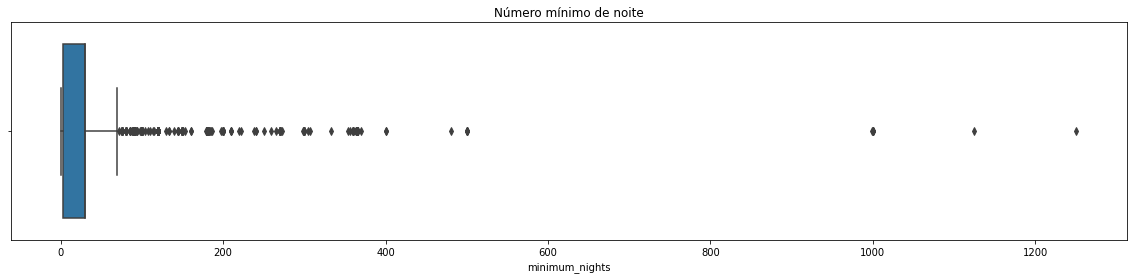

In [55]:
# Visualizar a quantidade de valores acima de 30 dias de hospedagem
plt.figure(figsize=(20,4))
ax = sns.boxplot(x = df["minimum_nights"])
ax.set_title("Número mínimo de noite")

print("minimum_nights: valores acima de 30 dias")
print(f"entradas: {len(df[df.minimum_nights > 30])}")

price: valores acima de $ 3000,00
entradas: 0


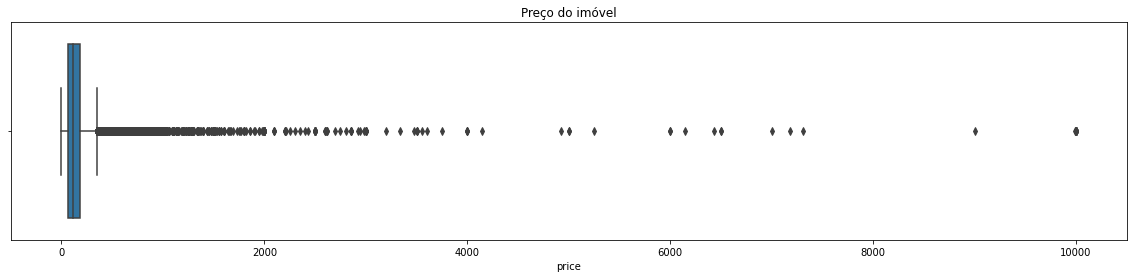

In [60]:
# Visualizar o preço dos imóveis acima de $ 3000,00
plt.figure(figsize=(20,4))
ax = sns.boxplot(x = df["price"])
ax.set_title("Preço do imóvel")

print("price: valores acima de $ 3000,00")
print(f"entradas: {len(df[df.minimum_nights > 3000])}")

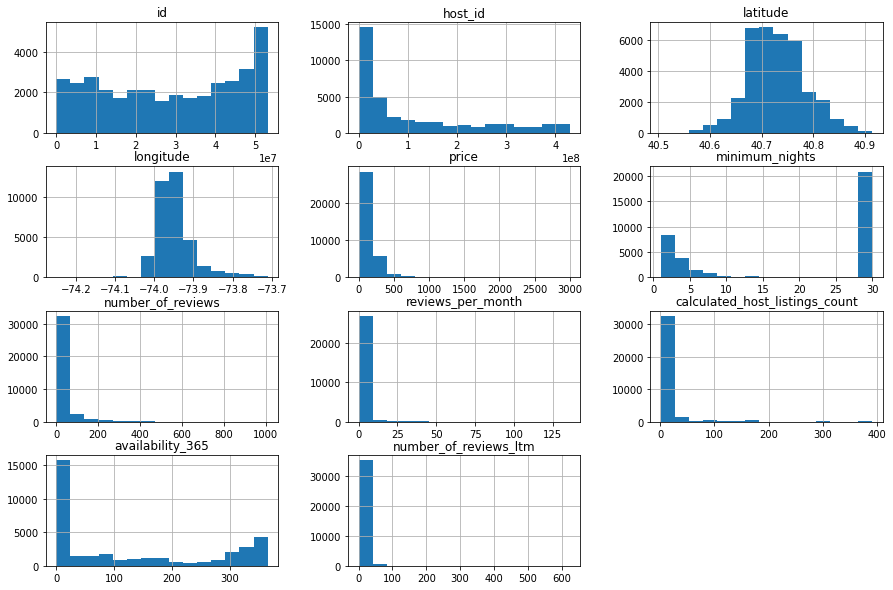

In [72]:
# remover os *outliers* e salvar em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 3000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois não temos dados para analizar
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

minimum_nights: valores acima de 30 dias
entradas: 0


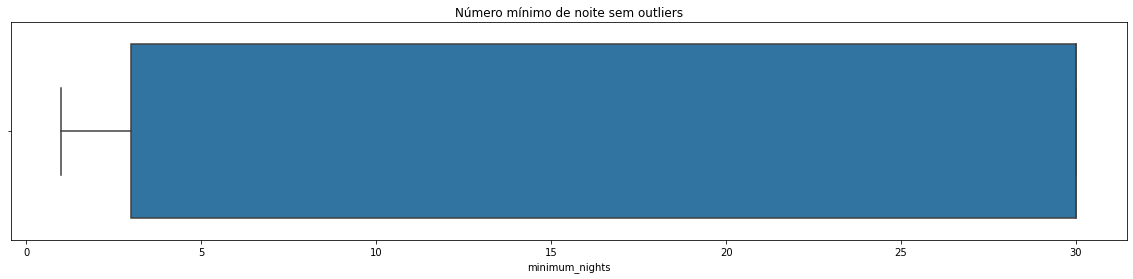

In [59]:
# Visualizar a quantidade de valores acima de 30 dias de hospedagem
plt.figure(figsize=(20,4))
ax = sns.boxplot(x = df_clean["minimum_nights"])
ax.set_title("Número mínimo de noite sem outliers")

print("minimum_nights: valores acima de 30 dias")
print(f"entradas: {len(df_clean[df_clean.minimum_nights > 30])}")

price: valores acima de $ 3000,00
entradas: 0


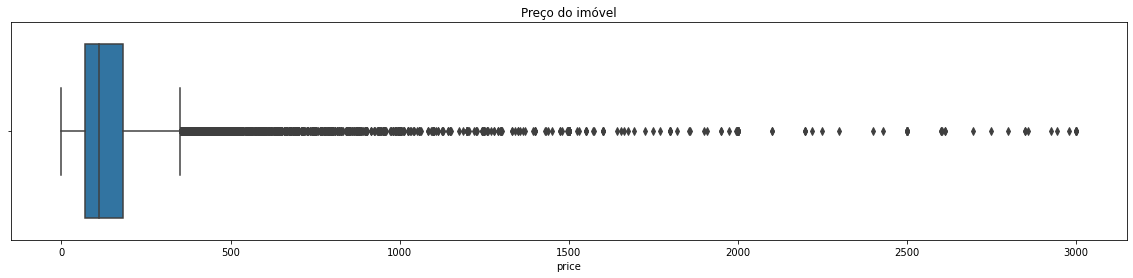

In [74]:
# Visualizar o preço dos imóveis acima de $ 3000,00
plt.figure(figsize=(20,4))
ax = sns.boxplot(x = df_clean["price"])
ax.set_title("Preço do imóvel")

print("price: valores acima de $ 3000,00")
print(f"entradas: {len(df_clean[df_clean.minimum_nights > 3000])}")

### **A média dos preços de aluguel**

In [75]:
# ver a média da coluna price
print(f'O preço médio de aluguel dos imóveis: {df_clean.price.mean():.2f}')

O preço médio de aluguel dos imóveis: 159.12


### **A correlação existente entre as variáveis**

Uma matriz de correlação é uma tabela que indica os coeficientes de conexão entre os fatores. Cada célula da tabela mostra a conexão entre os dois fatores.

In [39]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# Mostrar a mariz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.100362,-0.047724,0.007009,0.015603,0.124404
minimum_nights,-0.100362,1.000000,-0.259758,-0.321889,0.125377,-0.192362
number_of_reviews,-0.047724,-0.259758,1.000000,0.288654,-0.102929,0.111331
reviews_per_month,0.007009,-0.321889,0.288654,1.000000,0.003457,0.145885
calculated_host_listings_count,0.015603,0.125377,-0.102929,0.003457,1.000000,0.209421
availability_365,0.124404,-0.192362,0.111331,0.145885,0.209421,1.000000


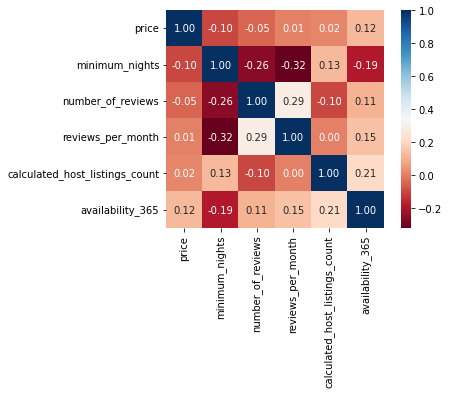

In [40]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor='white', annot = True);

### **O tipo de imóvel mais alugado no Airbnb**

In [13]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19256
Private room       16148
Shared room          557
Hotel room           244
Name: room_type, dtype: int64

In [14]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print('A porcentagem de cada tipo de imóvel disponível em % para alugar é:')
(df_clean.room_type.value_counts() / df.shape[0])*100

A porcentagem de cada tipo de imóvel disponível em % para alugar é:


Entire home/apt    51.059316
Private room       42.818126
Shared room         1.476944
Hotel room          0.646992
Name: room_type, dtype: float64

### **A localidade mais cara do dataset**



In [77]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:222]

neighbourhood
Fort Wadsworth       800.000000
Jamaica Estates      522.607143
Flatiron District    406.260870
Riverdale            405.000000
Tribeca              381.067164
                        ...    
Grant City            61.076923
Port Richmond         58.285714
Soundview             57.846154
Bull's Head           53.000000
Graniteville          40.000000
Name: price, Length: 222, dtype: float64

In [35]:
# plotar os imóveis pela latitude-longitude
fig = px.scatter_mapbox(df_clean, lat = "latitude", lon = "longitude", hover_name="neighbourhood", hover_data = ["price"], color = df_clean.price, 
                        color_continuous_scale = "Bluered_r", zoom = 3, height = 300, title = "Mapa de distribuição dos imóveis em Nova York")
fig.update_layout(
    mapbox_style = "carto-positron", # Estilo do mapa
    mapbox_zoom = 11.5, # escala 
    mapbox_center = {"lat": df_clean["latitude"].mean(), "lon": df_clean["longitude"].mean()}, # Centralizar o mapa
width= 1200, height = 800 
)
fig.show()

### **A média do mínimo de noites para aluguel (minimum_nights)**

In [24]:
# ver a média da coluna minimum_nights
print(f"A média do número mínimo de noites é: {df_clean.minimum_nights.mean():.2f} dias")

A média do número mínimo de noites é: 18.72 dias


## Conclusões

Com a execução do projeto, alguns insights podem ser retirados dessa análise como: 

Análise exploratória: Os dados possuem alguns valores faltantes, foi necessário realizar alguns procedimentos de limpeza e tratamento dos dados.

Possíveis Insights: 
* O preço médio de aluguel dos imóveis em Nova York é de U$ 159.12;
* O tipo de imóvel mais procurado é casa/apartamento com cerca de 51% dos aluguéis;
* O segundo tipo de imóvel mais alugado é "private room" com cerca de 43% dos aluguéis;
* A média do mínimo de noites que cada hospede aluga seu imóvel é de 19 dias.

Em relação a localidade mais cara de Nova york, a média do preço pode variar com alguns fatores como: quantidade de acomodações, no caso desta análise é o Fort Wadsworth com o preço de U$800,00 porém com apenas uma localidade de alguel. Os locais realmente caros ficam na região de Manhattan.









